In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [2]:
sns.set(context='notebook',style='white')

In [3]:
dir_data = "../../datasets/camargolab/"
dir_output = "output_fig6"

In [4]:
dict_palette={"HSC":"#0E76B9",'MPP':"#D2522A",'My':'#E8AF3C','Mk':'#79358C',
              'Ery':'#79A940','Ly':'#58C0EB','Other':'#991732'}

### Figure6 (Clonal Dynamics of Adult Hematopoiesis following Perturbation)

In [5]:
dict_input = loadmat(os.path.join(dir_data,'Analysis_5FU.mat'))

In [6]:
dict_input.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mouse', 'data_path', 'N_mice', 'samples', 'pos_samples', 'neg_samples', 'phenotypes', 'parent_HSC_clusters', 'childless_HSC_clusters', 'coarse_grain_pheno', 'hsc_pheno', 'marker_genes', 'None', 'pooled', 'fdr_level', 'p_crit', 'outdir', '__function_workspace__'])

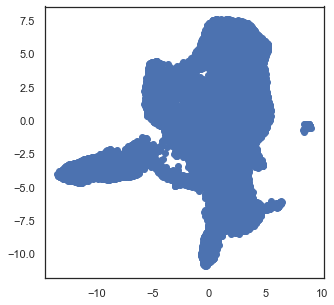

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(dict_input['pooled']['x'][0][0],dict_input['pooled']['y'][0][0])

In [8]:
df_fg = pd.DataFrame(columns=['label','clusters']) ##fine-grained phenotype
df_cg = pd.DataFrame(columns=['label','clusters']) ##coarse-grained phenotype
for i,row in enumerate(dict_input['phenotypes']):
    df_fg.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0], row[1].ravel().tolist()],
                               index= ['label','clusters'])
    
for i,row in enumerate(dict_input['coarse_grain_pheno']):
    df_cg.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0], row[1].ravel().tolist()],
                               index= ['label','clusters'])

In [9]:
df_fg.head()

,label,clusters
1,HSC,"[0, 2, 17, 19]"
2,MPP,"[1, 3, 4, 5, 11, 13, 15, 20, 21, 23, 24, 26, 2..."
3,MyP,"[10, 27]"
4,Neu,"[8, 16]"
5,Mono,"[7, 22]"


In [10]:
df_cg.head()

,label,clusters
1,HSC,[1]
2,MPP,[2]
3,My,"[3, 4, 5, 6, 7, 8]"
4,Mk,[9]
5,Ery,[10]


In [11]:
df_sample = pd.DataFrame(columns=['label']) ##sample name
for i,row in enumerate(dict_input['mouse']):
    df_sample.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0]],
                                   index= ['label'])

In [12]:
df_sample

,label
1,FO898
2,SB133
3,FO892_1
4,FO892_2
5,FO897


In [13]:
dict_samples = dict()
for i,x in enumerate(df_sample['label']):
    dict_input_x = dict_input['samples'][i][0]
    df_plot_x = pd.DataFrame(np.column_stack([dict_input_x['x'][0][0],dict_input_x['y'][0][0]]),
                           columns=['x','y'])
    df_plot_x['louvain'] = ['cluster_'+x for x in dict_input_x['louvain'][0][0].ravel().astype(str)]
    df_plot_x['sample'] = x
    ###fine-grain phenotype
    df_plot_x['fg_pheno'] = [df_fg.loc[x,'label'] for x in dict_input_x['fg_pheno'][0][0].ravel()]
    ###coarse-grain phenotype
    df_plot_x['cg_pheno'] = [df_cg.loc[x,'label'] for x in dict_input_x['cg_pheno'][0][0].ravel()]
    ###alleles
    df_plot_x['allele'] = [x for x in dict_input_x['allele'][0][0].ravel()]
    df_plot_x['allele_sample'] = df_plot_x['sample'] +'_'+ df_plot_x['allele'].apply(str)
    dict_samples[x] = df_plot_x

In [14]:
dict_sig_alleles = dict()
sig_alleles = list()
for i,x in enumerate(df_sample['label']):
    dict_input_x = dict_input['samples'][i][0]
    sig_alleles_x = dict_input_x['sig_alleles'][0][0]['all'][0][0].ravel()
    dict_sig_alleles[x] = sig_alleles_x
    sig_alleles += list(sig_alleles_x)

In [15]:
df_plot = pd.concat([dict_samples[k] for k in dict_samples.keys()],ignore_index=True)

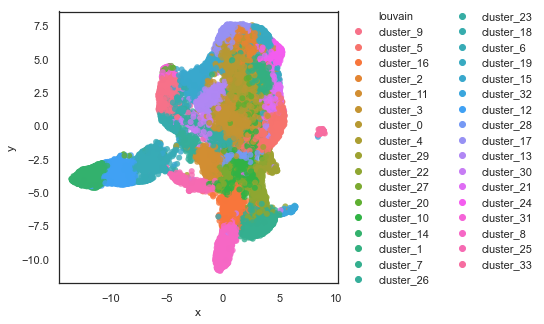

In [16]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), x="x", y="y",hue="louvain",linewidth=0,alpha=0.8)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=2,frameon=False)

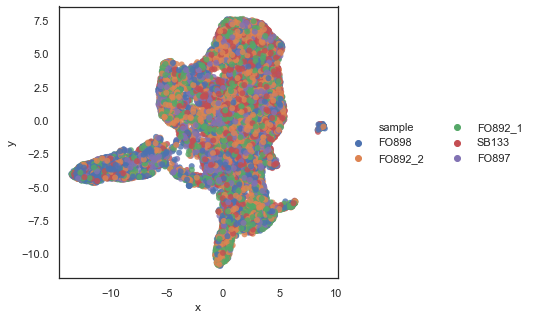

In [17]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), x="x", y="y",hue="sample",linewidth=0,alpha=0.8)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=2,frameon=False)

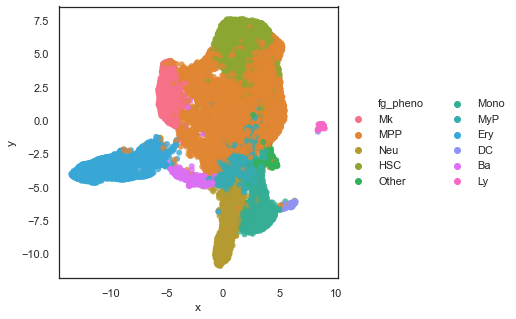

In [18]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), x="x", y="y",hue="fg_pheno",linewidth=0,alpha=0.8)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=2,frameon=False)

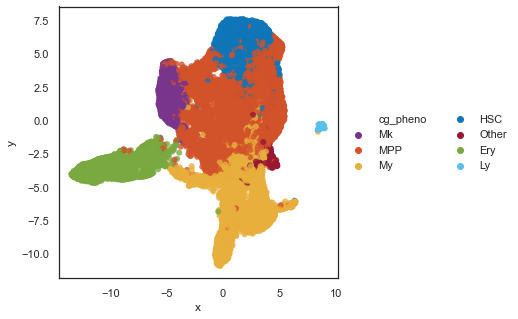

In [19]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), 
                   x="x", y="y",hue="cg_pheno",
                   linewidth=0,alpha=0.8,
                   palette=dict_palette)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=2,frameon=False)

(20, 8)


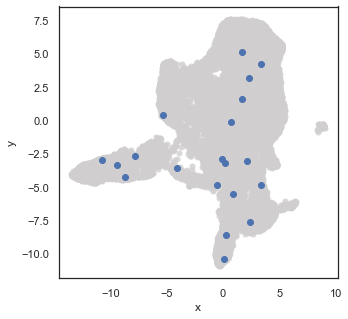

In [20]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), 
                   x="x", y="y",color='#D0CECE',
                   linewidth=0,alpha=0.8)
clone = 25
df_plot_clone = df_plot[(df_plot['allele']==clone)]
print(df_plot_clone.shape)
plt.scatter(df_plot_clone['x'],df_plot_clone['y'])

(3, 8)


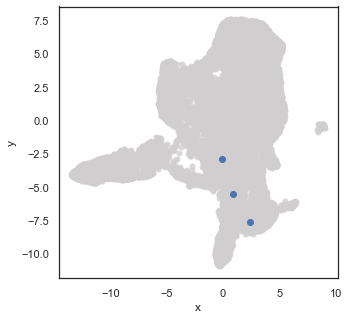

In [21]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), 
                   x="x", y="y",color='#D0CECE',
                   linewidth=0,alpha=0.8)
clone = 25
df_plot_clone = df_plot[(df_plot['allele_sample']=='FO898_'+str(clone))]
print(df_plot_clone.shape)
plt.scatter(df_plot_clone['x'],df_plot_clone['y'])

In [22]:
sum(df_plot['allele']>0)

12428

In [23]:
df_plot_subset = df_plot[np.isin(df_plot['allele'],sig_alleles)].copy()

In [24]:
df_plot_subset.shape

(3074, 8)

In [25]:
sizes = df_plot_subset.groupby(by=['allele','cg_pheno']).size()
clone_by_pheno = pd.DataFrame(data=0,
                              index = np.unique(df_plot_subset['allele']),
                              columns=np.unique(df_plot_subset['cg_pheno']))
for x in clone_by_pheno.index:
    for y in clone_by_pheno.columns:
        if(y in sizes[x].index):
            clone_by_pheno.loc[x,y] = sizes[x][y]
            
### reorder phenotypes
clone_by_pheno = clone_by_pheno[['HSC','MPP','My','Mk','Ery','Ly','Other']]

In [26]:
print(clone_by_pheno.shape)
clone_by_pheno.head()

(679, 7)


,HSC,MPP,My,Mk,Ery,Ly,Other
5,12,38,8,4,7,0,1
8,2,29,8,4,2,0,0
9,2,21,15,2,2,0,1
10,5,23,5,2,5,0,0
11,9,14,8,3,2,0,1


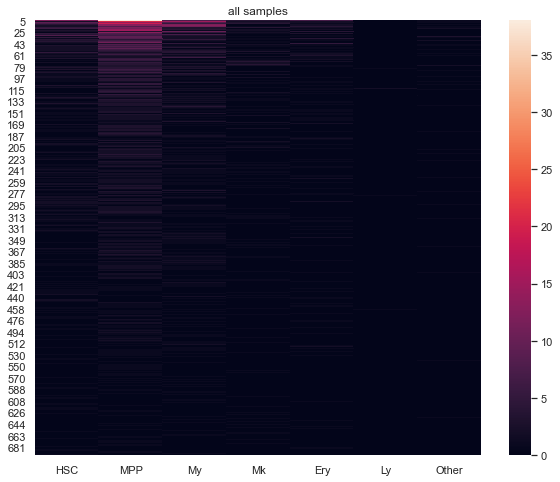

In [27]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(clone_by_pheno,annot=False)
plt.title('all samples')
plt.savefig(os.path.join(dir_output,'all_sample.png'),dpi=150)

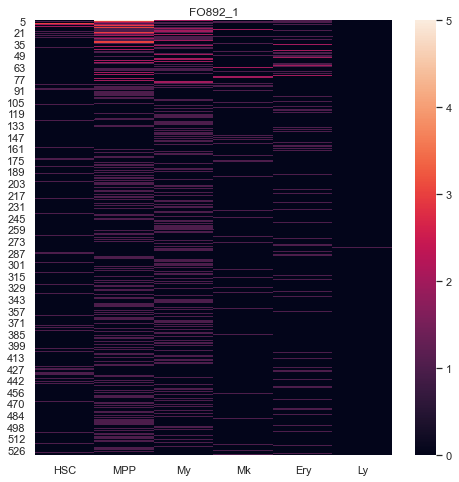

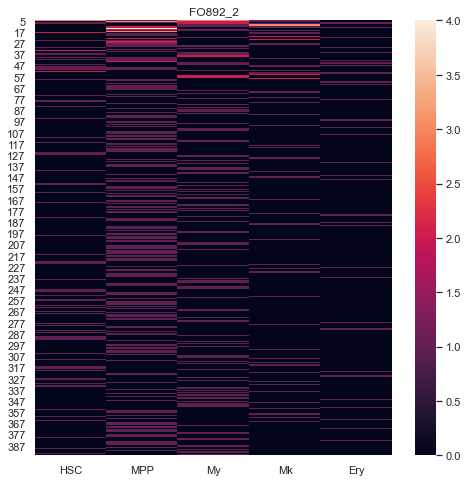

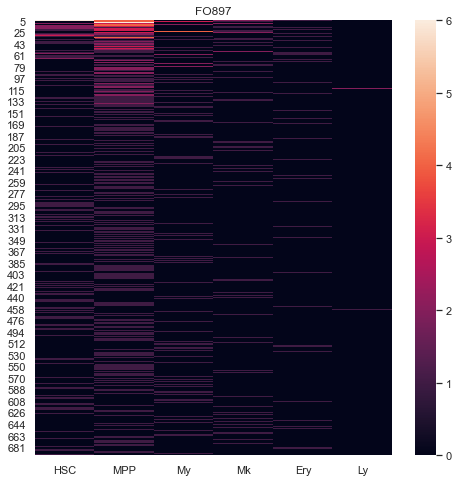

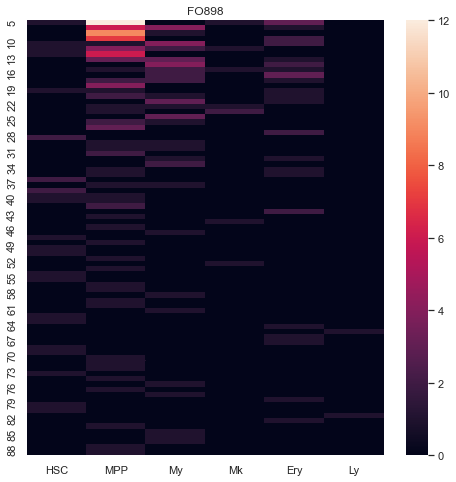

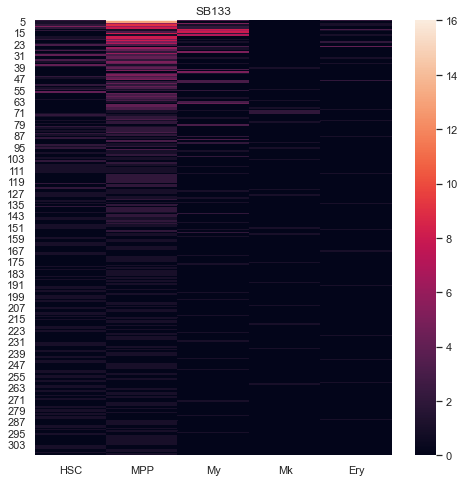

In [28]:
dict_sample = dict()
for x in np.unique(df_plot_subset['sample']):
    sizes_x = df_plot_subset.groupby(by=['sample','allele','cg_pheno']).size()
    clone_by_pheno_x = pd.DataFrame(data=0,
                                    index = np.unique(df_plot_subset[df_plot_subset['sample']==x]['allele']),
                                    columns=np.unique(df_plot_subset[df_plot_subset['sample']==x]['cg_pheno']))
    for xx in clone_by_pheno_x.index:
        for yy in clone_by_pheno_x.columns:
            if(yy in sizes_x[x][xx].index):
                clone_by_pheno_x.loc[xx,yy] = sizes_x[x][xx][yy]

    ### reorder phenotypes
    clone_by_pheno_x = clone_by_pheno_x[[xxx for xxx in ['HSC','MPP','My','Mk','Ery','Ly'] if xxx in clone_by_pheno_x.columns]]
    dict_sample[x] = clone_by_pheno_x
    plt.figure(figsize=(8,8))
    ax = sns.heatmap(clone_by_pheno_x,annot=False)
    plt.title(x)  
    plt.savefig(os.path.join(dir_output,x+'.png'),dpi=150)

### output

In [29]:
### clones of pooled bones
df_clones = pd.DataFrame(data = 0,
                         index=df_plot_subset.index,
                         columns=np.unique(df_plot_subset['allele']))
for i in range(df_plot_subset.shape[0]):
    df_clones.loc[df_plot_subset.index.tolist()[i],df_plot_subset['allele'].tolist()[i]] = 1

In [30]:
print(df_clones.shape)
df_clones.head()

(3074, 679)


,5,8,9,10,11,12,13,14,15,16,...,684,685,686,687,688,689,690,691,692,693
39,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
### mouse-specific clones
df_clones_mice = pd.DataFrame(data = 0,
                               index=df_plot_subset.index,
                               columns=np.unique(df_plot_subset['allele_sample']))
for i in range(df_plot_subset.shape[0]):
    df_clones_mice.loc[df_plot_subset.index.tolist()[i],df_plot_subset['allele_sample'].tolist()[i]] = 1

In [32]:
print(df_clones_mice.shape)
df_clones_mice.head()

(3074, 1980)


,FO892_1_10,FO892_1_100,FO892_1_101,FO892_1_102,FO892_1_103,FO892_1_104,FO892_1_105,FO892_1_106,FO892_1_107,FO892_1_108,...,SB133_90,SB133_91,SB133_92,SB133_93,SB133_94,SB133_95,SB133_96,SB133_97,SB133_98,SB133_99
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_metadata = df_plot_subset.copy()
df_metadata['time']=0
df_coord = df_plot_subset[['x','y']].rename(columns={x:i for i,x in enumerate(['x','y'])}).copy()

In [34]:
df_metadata.head()

,x,y,louvain,sample,fg_pheno,cg_pheno,allele,allele_sample,time
39,-11.558845,-3.945851,cluster_14,FO898,Ery,Ery,5,FO898_5,0
78,3.531715,-5.628629,cluster_22,FO898,Mono,My,62,FO898_62,0
109,1.044623,1.188584,cluster_3,FO898,MPP,MPP,5,FO898_5,0
118,-0.139373,2.255185,cluster_13,FO898,MPP,MPP,19,FO898_19,0
160,2.856734,2.404409,cluster_4,FO898,MPP,MPP,36,FO898_36,0


In [35]:
df_coord.head()

,0,1
39,-11.558845,-3.945851
78,3.531715,-5.628629
109,1.044623,1.188584
118,-0.139373,2.255185
160,2.856734,2.404409


In [36]:
# df_clones.to_csv(os.path.join(dir_output,'clones.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
df_clones_mice.to_csv(os.path.join(dir_output,'clones_mice.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
df_metadata.to_csv(os.path.join(dir_output,'metadata.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
df_coord.to_csv(os.path.join(dir_output,'coordinates.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')